In [1]:
!pip install matplotlib plotly


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install open3d


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import open3d

ModuleNotFoundError: No module named 'open3d'

In [1]:
import json
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting
import numpy as np

def load_json_point_clouds(json_filepath):
    """
    Loads point cloud data from a JSON file.
    
    :param json_filepath: Path to the JSON file.
    :return: List of objects with their names and vertices.
    """
    if not os.path.exists(json_filepath):
        raise FileNotFoundError(f"JSON file not found at: {json_filepath}")
    
    with open(json_filepath, 'r') as f:
        data = json.load(f)
    
    objects = data.get("objects", [])
    loaded_objects = []
    for obj in objects:
        object_name = obj.get("object_name", "Unnamed Object")
        vertices = obj.get("vertices", [])
        # Convert list of dicts to list of tuples
        vertex_coords = [(v["x"], v["y"], v["z"]) for v in vertices]
        loaded_objects.append({
            "object_name": object_name,
            "vertices": vertex_coords
        })
    
    return loaded_objects

# Define the path to your JSON file
# Adjust the path if your JSON file is located elsewhere
json_filename = "subdivided_objects_vertices.json"
json_path = os.path.join(os.getcwd(), json_filename)

# Load the JSON data
try:
    point_clouds = load_json_point_clouds(json_path)
    print(f"Successfully loaded {len(point_clouds)} objects from '{json_filename}'.")
    for obj in point_clouds:
        print(f" - {obj['object_name']}: {len(obj['vertices'])} vertices")
except FileNotFoundError as e:
    print(e)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")


Successfully loaded 25 objects from 'subdivided_objects_vertices.json'.
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 12914690 vertices


In [2]:
import json
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting
import numpy as np

def load_json_point_clouds(json_filepath):
    """
    Loads point cloud data from a JSON file.
    
    :param json_filepath: Path to the JSON file.
    :return: List of objects with their names and vertices.
    """
    if not os.path.exists(json_filepath):
        raise FileNotFoundError(f"JSON file not found at: {json_filepath}")
    
    with open(json_filepath, 'r') as f:
        data = json.load(f)
    
    objects = data.get("objects", [])
    loaded_objects = []
    for obj in objects:
        object_name = obj.get("object_name", "Unnamed Object")
        vertices = obj.get("vertices", [])
        # Convert list of dicts to list of tuples
        vertex_coords = [(v["x"], v["y"], v["z"]) for v in vertices]
        loaded_objects.append({
            "object_name": object_name,
            "vertices": vertex_coords
        })
    
    return loaded_objects

# Define the path to your JSON file
# Adjust the path if your JSON file is located elsewhere
json_filename = "subdivided_objects_vertices.json"
json_path = os.path.join(os.getcwd(), json_filename)

# Load the JSON data
try:
    point_clouds = load_json_point_clouds(json_path)
    print(f"Successfully loaded {len(point_clouds)} objects from '{json_filename}'.")
    for obj in point_clouds:
        print(f" - {obj['object_name']}: {len(obj['vertices'])} vertices")
except FileNotFoundError as e:
    print(e)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")


Successfully loaded 25 objects from 'subdivided_objects_vertices.json'.
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 12914690 vertices


In [3]:
def plot_point_clouds(point_clouds, title="3D Point Clouds Visualization"):
    """
    Plots multiple point clouds in a single 3D scatter plot.
    
    :param point_clouds: List of dictionaries with 'object_name' and 'vertices'.
    :param title: Title of the plot.
    """
    if not point_clouds:
        print("No point clouds to plot.")
        return
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Generate a color map with enough distinct colors
    num_objects = len(point_clouds)
    color_map = plt.cm.get_cmap('tab20', num_objects)
    
    for idx, obj in enumerate(point_clouds):
        points = obj["vertices"]
        if not points:
            print(f"No vertices for '{obj['object_name']}'. Skipping.")
            continue
        # Unzip the list of tuples into separate lists
        x, y, z = zip(*points)
        # Assign a unique color to each object
        color = color_map(idx)
        ax.scatter(x, y, z, c=[color], label=obj['object_name'], s=1, alpha=0.6)
    
    # Setting labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(title)
    
    # Add a legend
    ax.legend()
    
    # Set equal aspect ratio for all axes
    all_coords = np.array([vertex for obj in point_clouds for vertex in obj["vertices"]])
    max_range = (all_coords.max(axis=0) - all_coords.min(axis=0)).max() / 2.0
    
    mid_x = (all_coords[:,0].max() + all_coords[:,0].min()) * 0.5
    mid_y = (all_coords[:,1].max() + all_coords[:,1].min()) * 0.5
    mid_z = (all_coords[:,2].max() + all_coords[:,2].min()) * 0.5
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.show()


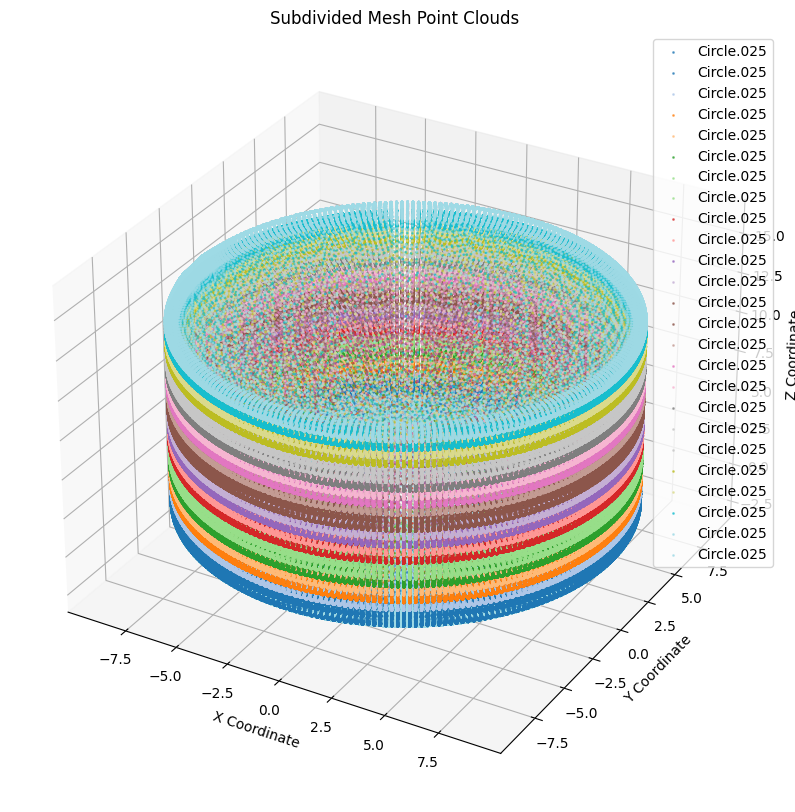

In [4]:
# Plot the point clouds
plot_point_clouds(point_clouds, title="Subdivided Mesh Point Clouds")


In [4]:
import json
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting
import numpy as np

def load_json_point_clouds(json_filepath):
    """
    Loads point cloud data from a JSON file.
    
    :param json_filepath: Path to the JSON file.
    :return: List of objects with their names and vertices.
    """
    if not os.path.exists(json_filepath):
        raise FileNotFoundError(f"JSON file not found at: {json_filepath}")
    
    with open(json_filepath, 'r') as f:
        data = json.load(f)
    
    objects = data.get("objects", [])
    loaded_objects = []
    for obj in objects:
        object_name = obj.get("object_name", "Unnamed Object")
        vertices = obj.get("vertices", [])
        # Convert list of dicts to list of tuples
        vertex_coords = [(v["x"], v["y"], v["z"]) for v in vertices]
        loaded_objects.append({
            "object_name": object_name,
            "vertices": vertex_coords
        })
    
    return loaded_objects

# Define the path to your JSON file
# Adjust the path if your JSON file is located elsewhere
json_filename = "subdivided_objects_vertices_dist.json"
json_path = os.path.join(os.getcwd(), json_filename)

# Load the JSON data
try:
    point_clouds = load_json_point_clouds(json_path)
    print(f"Successfully loaded {len(point_clouds)} objects from '{json_filename}'.")
    for obj in point_clouds:
        print(f" - {obj['object_name']}: {len(obj['vertices'])} vertices")
except FileNotFoundError as e:
    print(e)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")


Successfully loaded 25 objects from 'subdivided_objects_vertices_dist.json'.
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 201794 vertices
 - Circle.025: 12914690 vertices


In [5]:
def plot_point_clouds(point_clouds, title="3D Point Clouds Visualization"):
    """
    Plots multiple point clouds in a single 3D scatter plot.
    
    :param point_clouds: List of dictionaries with 'object_name' and 'vertices'.
    :param title: Title of the plot.
    """
    if not point_clouds:
        print("No point clouds to plot.")
        return
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Generate a color map with enough distinct colors
    num_objects = len(point_clouds)
    color_map = plt.cm.get_cmap('tab20', num_objects)
    
    for idx, obj in enumerate(point_clouds):
        points = obj["vertices"]
        if not points:
            print(f"No vertices for '{obj['object_name']}'. Skipping.")
            continue
        # Unzip the list of tuples into separate lists
        x, y, z = zip(*points)
        # Assign a unique color to each object
        color = color_map(idx)
        ax.scatter(x, y, z, c=[color], label=obj['object_name'], s=1, alpha=0.6)
    
    # Setting labels and title
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(title)
    
    # Add a legend
    ax.legend()
    
    # Set equal aspect ratio for all axes
    all_coords = np.array([vertex for obj in point_clouds for vertex in obj["vertices"]])
    max_range = (all_coords.max(axis=0) - all_coords.min(axis=0)).max() / 2.0
    
    mid_x = (all_coords[:,0].max() + all_coords[:,0].min()) * 0.5
    mid_y = (all_coords[:,1].max() + all_coords[:,1].min()) * 0.5
    mid_z = (all_coords[:,2].max() + all_coords[:,2].min()) * 0.5
    
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.show()


C:\Users\abhilash.durgam\AppData\Local\Temp\ipykernel_12676\2414379495.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_objects)


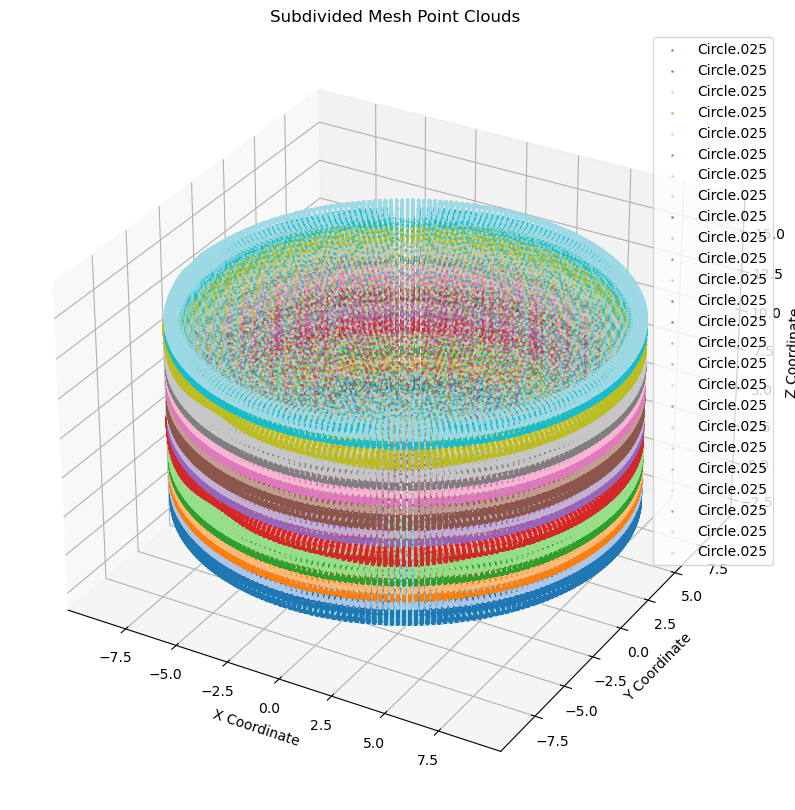

In [6]:
# Plot the point clouds
plot_point_clouds(point_clouds, title="Subdivided Mesh Point Clouds")


In [7]:
!pip install matplotlib numpy scipy


Defaulting to user installation because normal site-packages is not writeable


In [8]:
import json
import os
import numpy as np

def load_json_point_clouds(json_filepath):
    """
    Loads point cloud data from a JSON file.
    
    :param json_filepath: Path to the JSON file.
    :return: Dictionary mapping object names to NumPy arrays of vertex coordinates.
    """
    if not os.path.exists(json_filepath):
        raise FileNotFoundError(f"JSON file not found at: {json_filepath}")
    
    with open(json_filepath, 'r') as f:
        data = json.load(f)
    
    objects = data.get("objects", [])
    point_clouds = {}
    for obj in objects:
        object_name = obj.get("object_name", "Unnamed_Object")
        vertices = obj.get("vertices", [])
        # Convert list of dicts to NumPy array
        vertex_coords = np.array([[v["x"], v["y"], v["z"]] for v in vertices])
        point_clouds[object_name] = vertex_coords
    
    return point_clouds

# Define paths to your JSON files
original_json = "subdivided_objects_vertices.json"
distorted_json = "subdivided_objects_vertices_dist.json"

# Load the JSON data
try:
    original_point_clouds = load_json_point_clouds(original_json)
    distorted_point_clouds = load_json_point_clouds(distorted_json)
    print(f"Loaded {len(original_point_clouds)} objects from '{original_json}'.")
    print(f"Loaded {len(distorted_point_clouds)} objects from '{distorted_json}'.")
except FileNotFoundError as e:
    print(e)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")


Loaded 1 objects from 'subdivided_objects_vertices.json'.
Loaded 1 objects from 'subdivided_objects_vertices_dist.json'.


In [9]:
# Find common objects in both datasets
common_objects = set(original_point_clouds.keys()).intersection(set(distorted_point_clouds.keys()))
print(f"Number of common objects: {len(common_objects)}")

# List the common object names
print("Common Objects:")
for obj in common_objects:
    print(f" - {obj}")


Number of common objects: 1
Common Objects:
 - Circle.025


In [10]:
from scipy.spatial import cKDTree
from itertools import combinations

def chamfer_distance(pc1, pc2):
    """
    Computes the Chamfer Distance between two point clouds.
    
    :param pc1: NumPy array of shape (N, 3) for the first point cloud.
    :param pc2: NumPy array of shape (M, 3) for the second point cloud.
    :return: Chamfer Distance value.
    """
    tree1 = cKDTree(pc1)
    tree2 = cKDTree(pc2)

    # For each point in pc1, find the closest point in pc2
    distances1, _ = tree2.query(pc1, k=1)
    # For each point in pc2, find the closest point in pc1
    distances2, _ = tree1.query(pc2, k=1)

    # Compute Chamfer Distance
    chamfer_dist = np.mean(distances1) + np.mean(distances2)
    return chamfer_dist

def compute_all_chamfer_distances(original_pcs, distorted_pcs, common_objects):
    """
    Computes the Chamfer distance between all pairs of corresponding objects.
    
    :param original_pcs: Dictionary of original point clouds.
    :param distorted_pcs: Dictionary of distorted point clouds.
    :param common_objects: Set of object names present in both datasets.
    :return: List of tuples containing object name and Chamfer distance.
    """
    distance_results = []
    
    for obj_name in common_objects:
        pc_original = original_pcs[obj_name]
        pc_distorted = distorted_pcs[obj_name]
        
        # Check if both point clouds have the same number of vertices
        if pc_original.shape[0] != pc_distorted.shape[0]:
            print(f"Warning: '{obj_name}' has different number of vertices in original and distorted datasets.")
        
        # Compute Chamfer Distance
        distance = chamfer_distance(pc_original, pc_distorted)
        distance_results.append((obj_name, distance))
    
    return distance_results

# Compute Chamfer Distances
chamfer_results = compute_all_chamfer_distances(original_point_clouds, distorted_point_clouds, common_objects)

# Display the results
print("\nChamfer Distances Between Corresponding Objects:")
for obj_name, dist in chamfer_results:
    print(f" - {obj_name}: {dist}")



Chamfer Distances Between Corresponding Objects:
 - Circle.025: 0.0
